In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
ds = pd.read_csv('day.csv')
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Drop unnessesary columns 
- we drop instant because of its just a index columns
- we drop dteday because we can not predict current date effect on past date. we already has a month,holiday,season,workingday columns so we have no need to feature engineering from date column so we drop.
- we drop casual and registerd column because we have a cnt column which already contain total(casual + registered)
- we can drop yr column because we can not assume same situation in current year
- we can drop weekday because we have already has working day column so we have no need to feature engineering from date column

In [311]:
ds = ds.drop(['instant','dteday','casual','registered','yr','weekday'],axis = 1)

In [312]:
ds.head()

,season,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [313]:
ds.shape

(730, 10)

In [314]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 57.2 KB


# we dont have a missing data so we can not need to missing value treatment

In [315]:
ds.describe() #to show mean and median data diffrence if it is to large then we have a idea if any outliers

,season,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,6.526027,0.028767,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,3.450215,0.167266,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,4.000000,0.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,7.000000,0.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,10.000000,0.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,12.000000,1.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


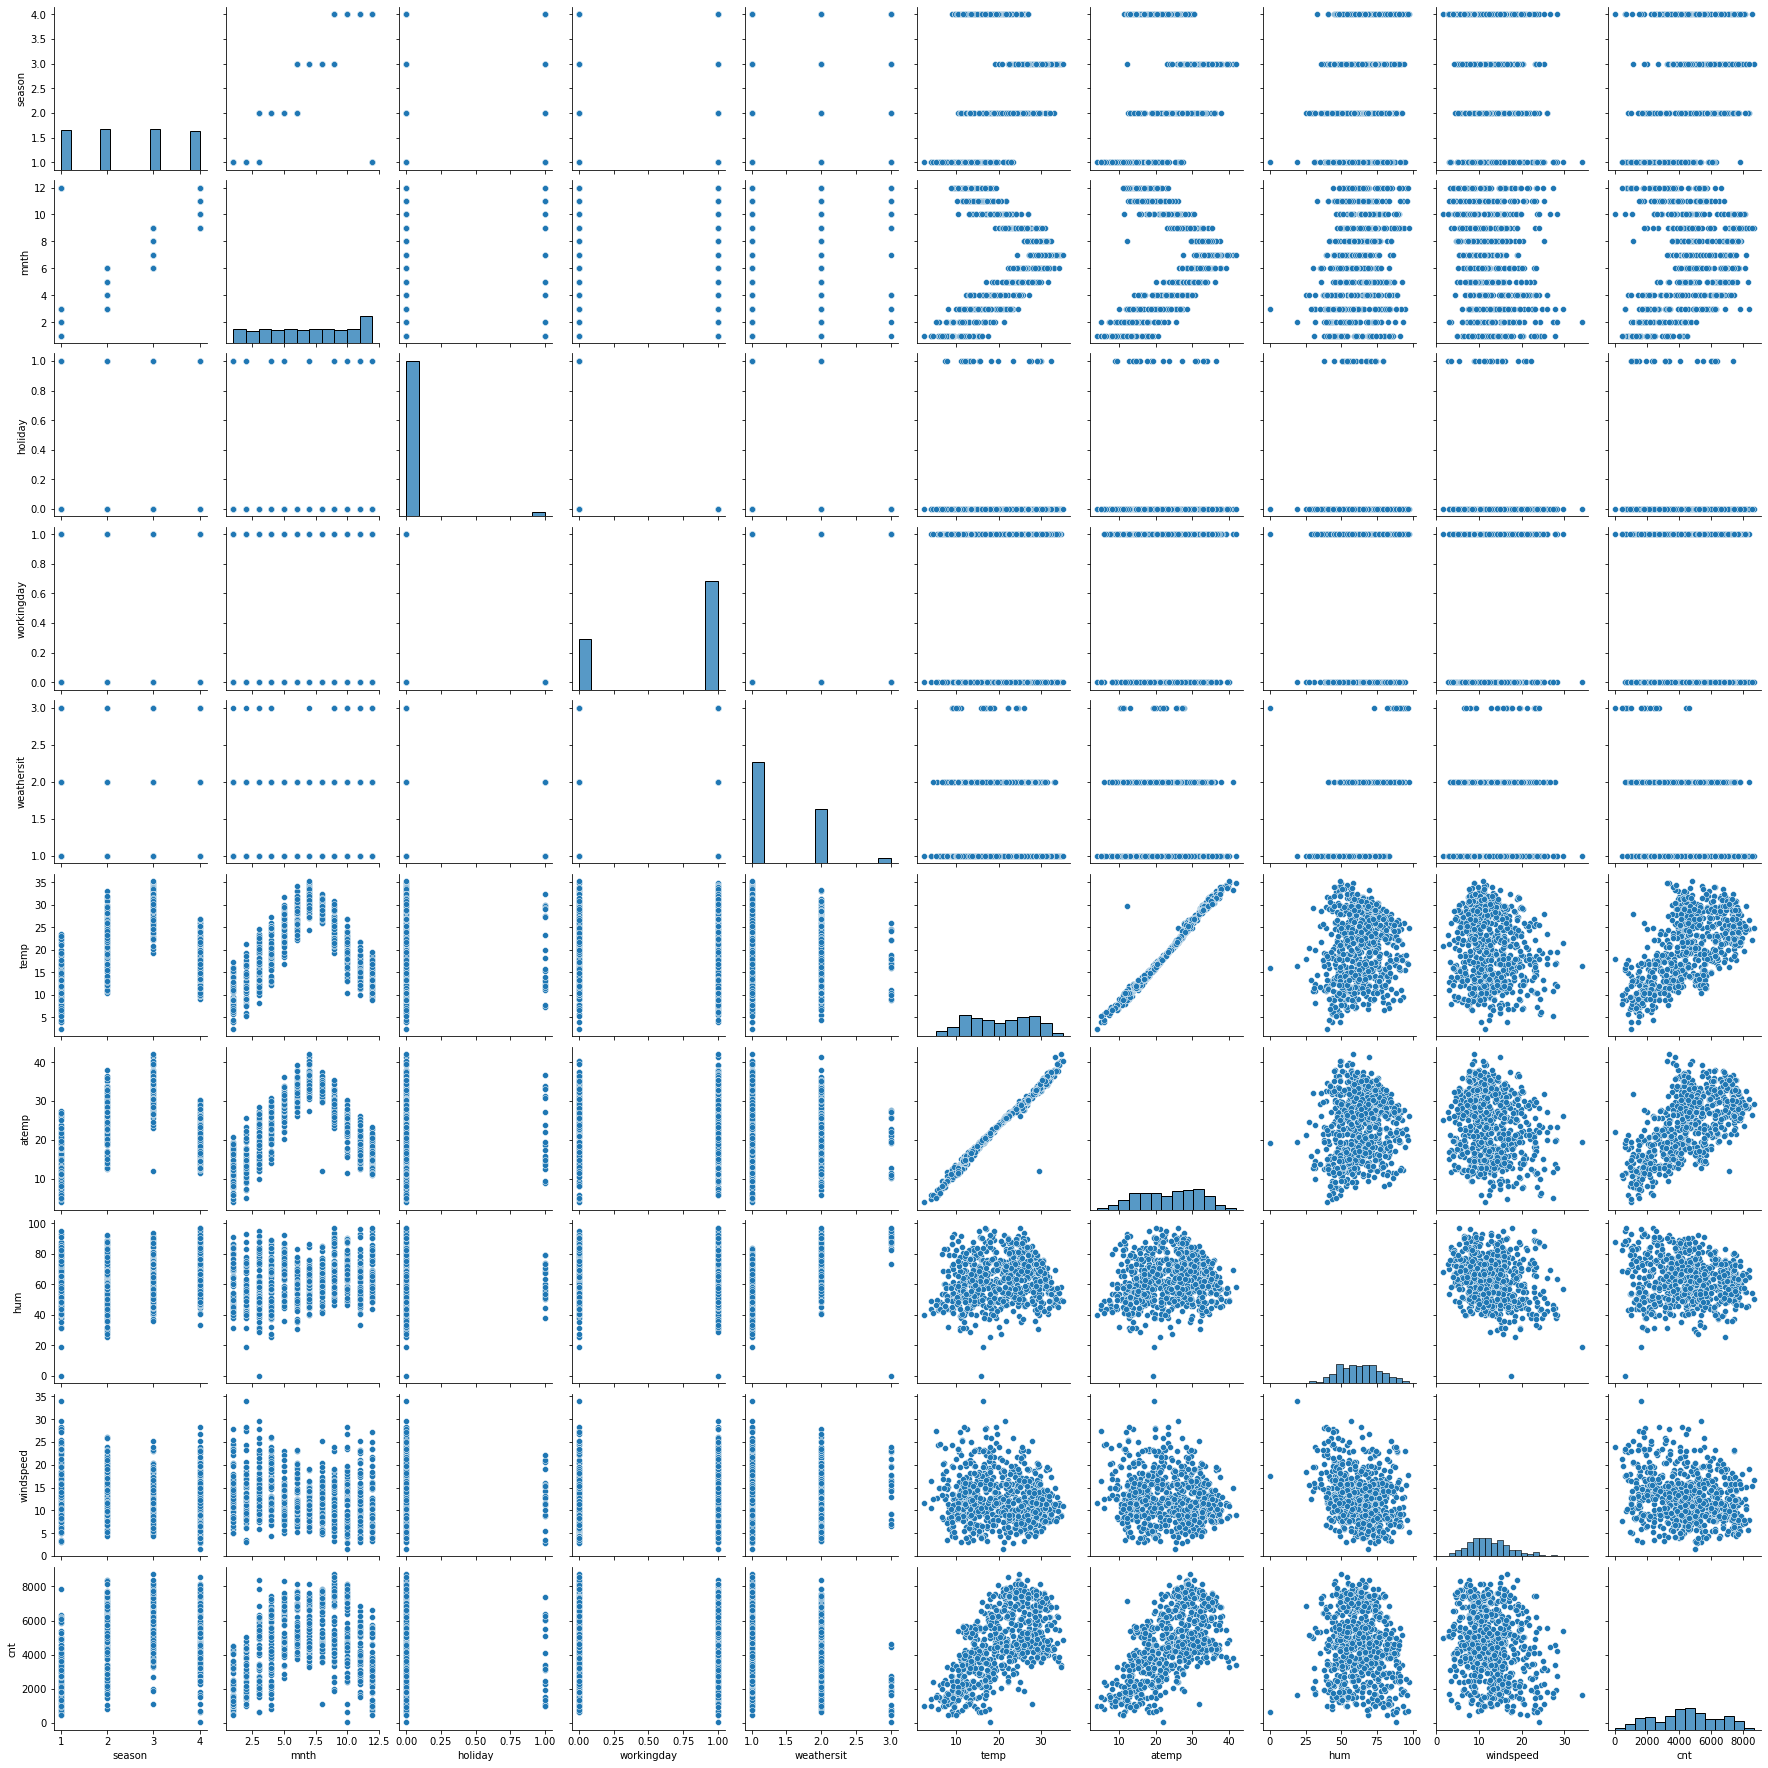

In [316]:
#visualising the numerical
sns.pairplot(ds)
plt.show()

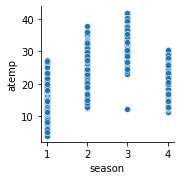

In [317]:
sns.pairplot(ds,x_vars = 'season',y_vars= 'atemp') # visualise  for the sanity check if we any temprature has a wrong value

In [318]:
ds[(ds.season == 3) & (ds.atemp < 20)] # we get wrong data so we can drop

,season,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
593,3,8,0,1,1,29.656653,12.12,57.0833,15.500718,7148


In [319]:
ds = ds.drop(593)
ds.shape

(729, 10)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

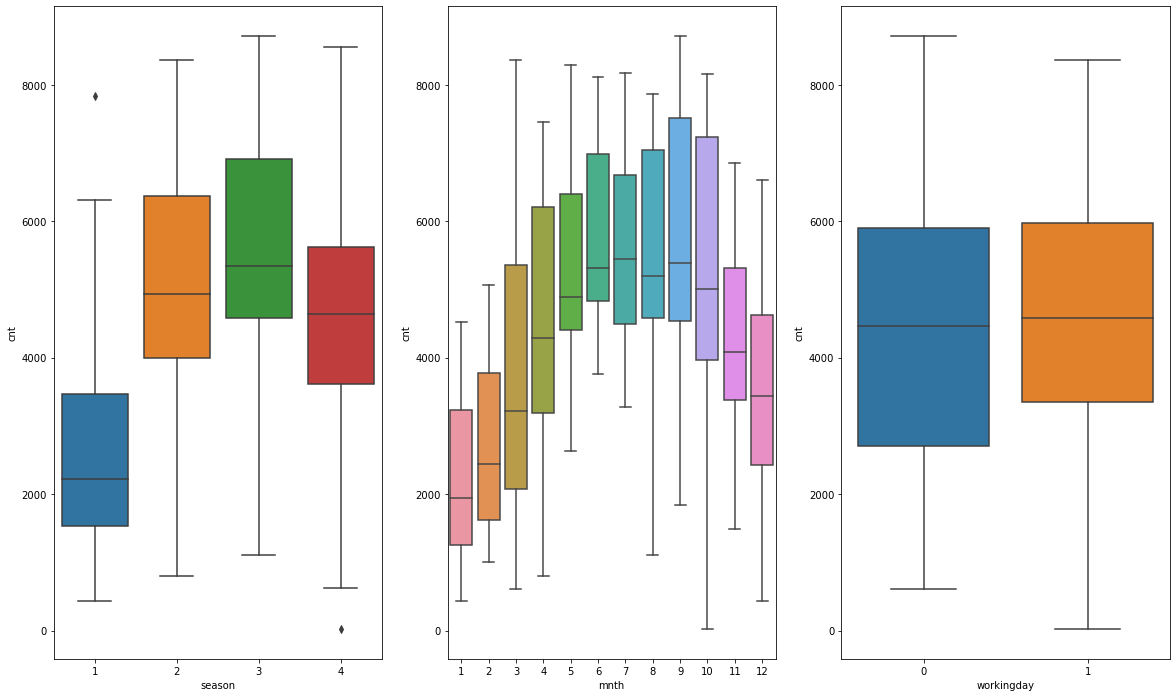

In [320]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = ds)

plt.subplot(1,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = ds)

plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = ds)

In [321]:
ds[(ds.season == 1) & (ds.cnt >7000)] # from the boxplot we interprate that data is outlier so we can drop

,season,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
440,1,3,0,0,2,21.080847,25.2523,75.5833,7.417168,7836


In [322]:
ds[(ds.season == 4) & (ds.cnt <100)]# from the boxplot we interprate that data is outlier so we can drop

,season,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
666,4,10,0,1,3,18.04,21.97,88.0,23.9994,22


In [323]:
ds = ds.drop(440)
ds = ds.drop(666)
ds.shape

(727, 10)

In [324]:
#create dummy variable for season
season = pd.get_dummies(ds["season"],drop_first = True)
season = season.rename(columns = {2:'summer',3:'fall',4:'winter'})
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [325]:
ds = pd.concat([ds,season],axis=1)

In [326]:
ds = ds.drop('season',axis = 1) # drop because we convert into dummy variables

In [327]:
month = pd.get_dummies(ds["mnth"],drop_first = True)
month = month.rename(columns = {2:'Feb',3:'Mar',4:'April',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
month.head()

,Feb,Mar,April,May,Jun,July,Aug,Sept,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [328]:
ds = pd.concat([ds,month],axis=1)

In [329]:
ds = ds.drop('mnth',axis = 1) # drop because we convert into dummy variables

In [330]:
weathersit = pd.get_dummies(ds["weathersit"],drop_first = True)
weathersit = weathersit.rename(columns = {2:'Cloudy',3:'Light',4:'Heavy'})
weathersit.head()

,Cloudy,Light
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [331]:
ds = pd.concat([ds,weathersit],axis=1)
ds = ds.drop('weathersit',axis = 1) # drop because we convert into dummy variables
ds.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,Cloudy,Light
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  Split data into train and test

In [332]:
from sklearn.model_selection import train_test_split
df_train,df_test =train_test_split(ds,train_size = 0.7,random_state = 100)
print(df_train.shape,df_test.shape)

(508, 23) (219, 23)


In [333]:
from sklearn.preprocessing import MinMaxScaler

#1. Instantiate an object
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed']
#2. fit on data
#scaler.fit
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

<ipython-input-333-e70517ea71a6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\jaypa\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,Cloudy,Light
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,...,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.00000,508.000000
mean,0.025591,0.673228,0.542857,0.510272,0.646701,0.319849,4477.389764,0.238189,0.261811,0.251969,...,0.088583,0.074803,0.080709,0.092520,0.078740,0.084646,0.088583,0.092520,0.34252,0.025591
std,0.158066,0.469495,0.233367,0.215848,0.145273,0.169085,1970.187400,0.426395,0.440054,0.434571,...,0.284421,0.263333,0.272656,0.290044,0.269598,0.278628,0.284421,0.290044,0.47502,0.158066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.338732,0.323386,0.536311,0.198843,2934.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,1.000000,0.540148,0.520207,0.642674,0.298787,4514.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,1.000000,0.748692,0.690521,0.751286,0.414751,5919.250000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Training the model

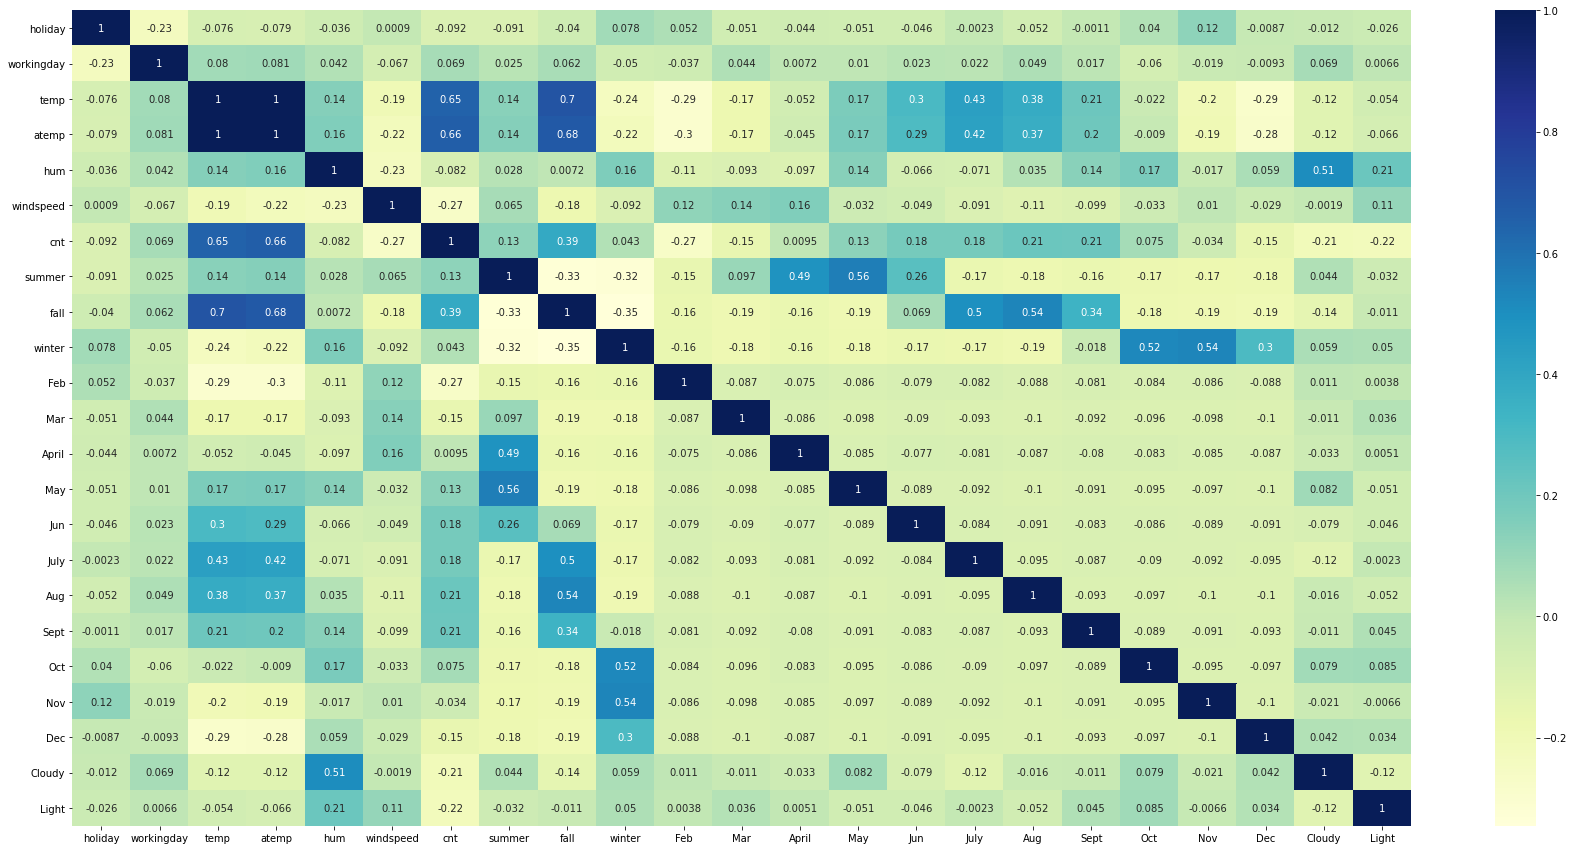

In [334]:
#heat map
plt.figure(figsize = (30,15))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [335]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,Feb,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,Cloudy,Light
728,0,0,0.249242,0.200348,0.497001,0.663106,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
581,0,0,0.899689,0.855850,0.670951,0.533402,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
111,0,1,0.351667,0.318819,0.750214,0.380981,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
578,0,1,0.878570,0.824359,0.678234,0.187140,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
662,0,1,0.621982,0.591497,0.823051,0.176436,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [336]:
#import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [337]:
X_train_sm = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     33.23
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.40e-82
Time:                        20:41:16   Log-Likelihood:                -4340.5
No. Observations:                 508   AIC:                             8727.
Df Residuals:                     485   BIC:                             8824.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3414.4905    403.227      8.468      0.000    2622.204    4206.777
holiday     -657.0032    374.639     -1.754      0.080   -1393.120      79.114
workingday    70.6705    125.199      0.564      0.573    -175.328     316.669
temp         503.5300   3754.329      0.134      0.893   -6873.229    7880.289
atemp       5475.5352   3855.469      1.420      0.156   -2099.950    1.31e+04
hum        -3172.2751    547.528     -5.794      0.000   -4248.095   -2096.455
windspeed  -1574.1485    396.919     -3.966      0.000   -2354.043    -794.255
summer       692.0960    348.354      1.987      0.048       7.626    1376.566
fall         456.5529    427.134      1.069      0.286    -382.708    1295.814
winter      1296.3105    352.282      3.680      0.000     604.123    1988.498
Feb           83.7085    290.607      0.288      0.773    -487.295     654.712
Mar          136.4078    328.870      0.415      0.678    -509.779     782.594
April        211.2185    495.788      0.426      0.670    -762.940    1185.377
May          218.0633    535.645      0.407      0.684    -834.408    1270.535
Jun         -285.7863    577.601     -0.495      0.621   -1420.695     849.122
July        -701.2144    642.675     -1.091      0.276   -1963.985     561.556
Aug         -103.9381    614.335     -0.169      0.866   -1311.025    1103.149
Sept         674.6525    544.932      1.238      0.216    -396.067    1745.372
Oct          244.2233    480.343      0.508      0.611    -699.586    1188.033
Nov          -44.8764    453.701     -0.099      0.921    -936.338     846.585
Dec           94.9052    358.263      0.265      0.791    -609.034     798.845
Cloudy      -260.8939    152.793     -1.708      0.088    -561.112      39.324
Light      -1759.8709    403.534     -4.361      0.000   -2552.762    -966.980
==============================================================================
Omnibus:                       39.917   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.627
Skew:                          -0.000   Prob(JB):                      0.00110
Kurtosis:                       2.198   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,1543.75
3,atemp,1428.87
4,hum,20.51
7,fall,14.99
15,Aug,10.96
14,July,10.46
8,winter,9.81
6,summer,9.07
12,May,7.98
13,Jun,7.82


In [339]:
X_train_new  = X_train.drop(["temp"], axis = 1) # P-value > 0.05 also VIF > 5
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.88
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           4.04e-83
Time:                        20:41:16   Log-Likelihood:                -4340.5
No. Observations:                 508   AIC:                             8725.
Df Residuals:                     486   BIC:                             8818.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3413.4759    402.748      8.475      0.000    2622.133    4204.818
holiday     -653.2635    373.223     -1.750      0.081   -1386.593      80.066
workingday    71.0321    125.043      0.568      0.570    -174.660     316.724
atemp       5984.5833    676.832      8.842      0.000    4654.706    7314.461
hum        -3174.1241    546.801     -5.805      0.000   -4248.510   -2099.738
windspeed  -1554.9403    369.807     -4.205      0.000   -2281.558    -828.323
summer       689.8529    347.601      1.985      0.048       6.866    1372.839
fall         459.0914    426.283      1.077      0.282    -378.494    1296.677
winter      1295.5448    351.880      3.682      0.000     604.151    1986.938
Feb           84.0378    290.303      0.289      0.772    -486.365     654.441
Mar          140.4334    327.167      0.429      0.668    -502.403     783.269
April        216.0124    493.999      0.437      0.662    -754.624    1186.649
May          232.3342    524.440      0.443      0.658    -798.115    1262.784
Jun         -263.6380    552.931     -0.477      0.634   -1350.069     822.793
July        -680.5120    623.232     -1.092      0.275   -1905.074     544.050
Aug          -83.2276    594.011     -0.140      0.889   -1250.374    1083.918
Sept         689.9094    532.388      1.296      0.196    -356.157    1735.975
Oct          248.7605    478.665      0.520      0.604    -691.749    1189.270
Nov          -43.0646    453.041     -0.095      0.924    -933.226     847.096
Dec           95.1229    357.897      0.266      0.791    -608.094     798.340
Cloudy      -260.2783    152.570     -1.706      0.089    -560.056      39.499
Light      -1752.8883    399.757     -4.385      0.000   -2538.354    -967.423
==============================================================================
Omnibus:                       39.694   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.587
Skew:                          -0.002   Prob(JB):                      0.00112
Kurtosis:                       2.199   Cond. No.                         41.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [340]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,43.15
3,hum,20.45
6,fall,14.96
14,Aug,10.27
13,July,9.86
7,winter,9.81
5,summer,9.05
11,May,7.66
12,Jun,7.18
15,Sept,7.02


In [341]:
X_train_new  = X_train_new.drop(["Nov"], axis = 1) # P-value > 0.05 also VIF > 5
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     36.70
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           6.61e-84
Time:                        20:41:17   Log-Likelihood:                -4340.5
No. Observations:                 508   AIC:                             8723.
Df Residuals:                     487   BIC:                             8812.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3409.9611    400.639      8.511      0.000    2622.767    4197.155
holiday     -656.3375    371.441     -1.767      0.078   -1386.161      73.486
workingday    70.7309    124.876      0.566      0.571    -174.631     316.093
atemp       5971.4438    661.892      9.022      0.000    4670.927    7271.960
hum        -3173.8968    546.239     -5.810      0.000   -4247.174   -2100.620
windspeed  -1558.7977    367.199     -4.245      0.000   -2280.288    -837.307
summer       682.6655    338.932      2.014      0.045      16.715    1348.616
fall         444.8157    398.546      1.116      0.265    -338.267    1227.898
winter      1270.0539    227.598      5.580      0.000     822.858    1717.250
Feb           92.9183    274.579      0.338      0.735    -446.588     632.425
Mar          153.3892    297.122      0.516      0.606    -430.410     737.189
April        234.6370    453.020      0.518      0.605    -655.477    1124.751
May          252.4376    479.417      0.527      0.599    -689.544    1194.419
Jun         -239.5535    490.963     -0.488      0.626   -1204.221     725.114
July        -650.7575    538.374     -1.209      0.227   -1708.580     407.065
Aug          -54.4593    510.611     -0.107      0.915   -1057.732     948.813
Sept         720.0724    427.055      1.686      0.092    -119.025    1559.170
Oct          285.7425    278.570      1.026      0.306    -261.605     833.090
Dec          120.9550    232.657      0.520      0.603    -336.181     578.091
Cloudy      -260.0825    152.400     -1.707      0.089    -559.526      39.361
Light      -1754.7730    398.859     -4.399      0.000   -2538.469    -971.077
==============================================================================
Omnibus:                       40.018   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.646
Skew:                          -0.002   Prob(JB):                      0.00109
Kurtosis:                       2.197   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,41.02
3,hum,20.30
6,fall,13.08
5,summer,8.62
14,Aug,7.59
13,July,7.37
11,May,6.41
12,Jun,5.68
15,Sept,4.51
10,April,4.45


In [343]:
X_train_new  = X_train_new.drop(["Aug"], axis = 1) # P-value > 0.05 also VIF > 5
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.71
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.05e-84
Time:                        20:41:17   Log-Likelihood:                -4340.5
No. Observations:                 508   AIC:                             8721.
Df Residuals:                     488   BIC:                             8806.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3411.7057    399.899      8.531      0.000    2625.969    4197.442
holiday     -653.4723    370.092     -1.766      0.078   -1380.643      73.699
workingday    70.9274    124.736      0.569      0.570    -174.158     316.013
atemp       5935.1039    566.883     10.470      0.000    4821.272    7048.936
hum        -3169.0127    543.765     -5.828      0.000   -4237.422   -2100.603
windspeed  -1557.7067    366.685     -4.248      0.000   -2278.182    -837.231
summer       670.0420    317.273      2.112      0.035      46.652    1293.432
fall         420.0423    323.535      1.298      0.195    -215.650    1055.735
winter      1273.6135    224.910      5.663      0.000     831.702    1715.525
Feb           98.1731    269.849      0.364      0.716    -432.037     628.383
Mar          167.5161    265.696      0.630      0.529    -354.533     689.565
April        259.6668    387.102      0.671      0.503    -500.926    1020.260
May          282.8405    385.074      0.735      0.463    -473.767    1039.448
Jun         -200.7967    329.812     -0.609      0.543    -848.824     447.231
July        -601.2287    272.113     -2.209      0.028   -1135.885     -66.572
Sept         757.2179    246.891      3.067      0.002     272.117    1242.319
Oct          295.2954    263.510      1.121      0.263    -222.459     813.050
Dec          125.2765    228.870      0.547      0.584    -324.415     574.968
Cloudy      -261.2892    151.826     -1.721      0.086    -559.602      37.024
Light      -1756.4527    398.144     -4.412      0.000   -2538.740    -974.165
==============================================================================
Omnibus:                       39.734   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.594
Skew:                          -0.002   Prob(JB):                      0.00112
Kurtosis:                       2.199   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,30.09
3,hum,19.77
6,fall,8.65
5,summer,7.57
11,May,4.15
4,windspeed,4.01
7,winter,3.93
10,April,3.24
1,workingday,3.15
12,Jun,2.57


In [345]:
X_train_new  = X_train_new.drop(["Feb"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     40.92
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.73e-85
Time:                        20:41:17   Log-Likelihood:                -4340.6
No. Observations:                 508   AIC:                             8719.
Df Residuals:                     489   BIC:                             8800.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3447.0573    387.569      8.894      0.000    2685.550    4208.564
holiday     -653.3982    369.764     -1.767      0.078   -1379.920      73.124
workingday    70.9679    124.625      0.569      0.569    -173.898     315.834
atemp       5944.7538    565.759     10.508      0.000    4833.135    7056.373
hum        -3172.6526    543.190     -5.841      0.000   -4239.928   -2105.378
windspeed  -1552.4897    366.079     -4.241      0.000   -2271.772    -833.208
summer       654.1795    313.984      2.083      0.038      37.255    1271.104
fall         382.9831    306.807      1.248      0.213    -219.840     985.807
winter      1242.0706    207.342      5.990      0.000     834.679    1649.462
Mar          134.2886    249.283      0.539      0.590    -355.510     624.088
April        235.5429    381.042      0.618      0.537    -513.139     984.225
May          258.4512    378.857      0.682      0.495    -485.937    1002.839
Jun         -218.7639    325.804     -0.671      0.502    -858.913     421.385
July        -606.6742    271.459     -2.235      0.026   -1140.045     -73.303
Sept         752.4242    246.320      3.055      0.002     268.447    1236.401
Oct          287.5585    262.418      1.096      0.274    -228.047     803.164
Dec          108.4460    223.946      0.484      0.628    -331.570     548.462
Cloudy      -261.7107    151.687     -1.725      0.085    -559.749      36.327
Light      -1751.9594    397.599     -4.406      0.000   -2533.172    -970.746
==============================================================================
Omnibus:                       39.373   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.527
Skew:                          -0.002   Prob(JB):                      0.00116
Kurtosis:                       2.201   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,29.82
3,hum,18.70
6,fall,7.77
5,summer,7.42
10,May,4.01
4,windspeed,3.85
7,winter,3.41
9,April,3.16
1,workingday,3.14
11,Jun,2.51


In [347]:
X_train_new  = X_train_new.drop(["Dec"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     43.38
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.89e-86
Time:                        20:41:17   Log-Likelihood:                -4340.7
No. Observations:                 508   AIC:                             8717.
Df Residuals:                     490   BIC:                             8794.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3460.2108    386.314      8.957      0.000    2701.174    4219.248
holiday     -663.8026    368.851     -1.800      0.073   -1388.527      60.921
workingday    70.8817    124.527      0.569      0.569    -173.792     315.555
atemp       5919.0968    562.833     10.517      0.000    4813.234    7024.960
hum        -3150.5827    540.852     -5.825      0.000   -4213.258   -2087.908
windspeed  -1555.6707    365.734     -4.254      0.000   -2274.271    -837.070
summer       650.9536    313.668      2.075      0.038      34.653    1267.254
fall         380.8071    306.535      1.242      0.215    -221.478     983.092
winter      1267.3911    200.484      6.322      0.000     873.477    1661.305
Mar          120.8979    247.551      0.488      0.626    -365.495     607.291
April        226.5263    380.290      0.596      0.552    -520.673     973.726
May          250.9118    378.241      0.663      0.507    -492.263     994.086
Jun         -222.4342    325.462     -0.683      0.495    -861.907     417.038
July        -608.7605    271.213     -2.245      0.025   -1141.645     -75.876
Sept         738.0667    244.338      3.021      0.003     257.986    1218.147
Oct          248.1354    249.275      0.995      0.320    -241.645     737.915
Cloudy      -263.6403    151.516     -1.740      0.082    -561.341      34.060
Light      -1749.1447    397.246     -4.403      0.000   -2529.660    -968.629
==============================================================================
Omnibus:                       38.784   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.418
Skew:                          -0.003   Prob(JB):                      0.00122
Kurtosis:                       2.204   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,29.62
3,hum,17.95
6,fall,7.77
5,summer,7.42
10,May,4.00
4,windspeed,3.85
7,winter,3.19
9,April,3.15
1,workingday,3.14
11,Jun,2.51


In [349]:
X_train_new  = X_train_new.drop(["Mar"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     46.15
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           4.70e-87
Time:                        20:41:17   Log-Likelihood:                -4340.8
No. Observations:                 508   AIC:                             8716.
Df Residuals:                     491   BIC:                             8788.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3476.6454    384.547      9.041      0.000    2721.084    4232.207
holiday     -672.9182    368.092     -1.828      0.068   -1396.149      50.312
workingday    73.6601    124.301      0.593      0.554    -170.567     317.887
atemp       5967.8615    553.475     10.783      0.000    4880.390    7055.333
hum        -3165.1657    539.608     -5.866      0.000   -4225.392   -2104.940
windspeed  -1541.2802    364.262     -4.231      0.000   -2256.985    -825.575
summer       699.0835    297.553      2.349      0.019     114.449    1283.718
fall         346.4998    298.145      1.162      0.246    -239.299     932.298
winter      1237.5381    190.790      6.486      0.000     862.673    1612.403
April        139.7745    335.993      0.416      0.678    -520.387     799.935
May          160.4832    329.564      0.487      0.627    -487.047     808.013
Jun         -289.1936    295.134     -0.980      0.328    -869.074     290.687
July        -627.4823    268.282     -2.339      0.020   -1154.605    -100.360
Sept         727.7512    243.235      2.992      0.003     249.841    1205.661
Oct          242.2257    248.788      0.974      0.331    -246.595     731.046
Cloudy      -265.2625    151.362     -1.753      0.080    -562.659      32.134
Light      -1740.5164    396.545     -4.389      0.000   -2519.651    -961.382
==============================================================================
Omnibus:                       37.652   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.203
Skew:                          -0.000   Prob(JB):                      0.00136
Kurtosis:                       2.210   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,28.45
3,hum,17.94
6,fall,7.34
5,summer,6.69
4,windspeed,3.75
1,workingday,3.12
9,May,3.02
7,winter,2.90
8,April,2.47
14,Cloudy,2.21


In [351]:
X_train_new  = X_train_new.drop(["April"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     49.30
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.16e-88
Time:                        20:41:17   Log-Likelihood:                -4340.9
No. Observations:                 508   AIC:                             8714.
Df Residuals:                     492   BIC:                             8781.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3476.0506    384.221      9.047      0.000    2721.133    4230.968
holiday     -673.8203    367.776     -1.832      0.068   -1396.426      48.786
workingday    73.5986    124.196      0.593      0.554    -170.422     317.619
atemp       5973.9935    552.813     10.807      0.000    4887.827    7060.160
hum        -3173.9537    538.741     -5.891      0.000   -4232.471   -2115.437
windspeed  -1527.8068    362.515     -4.214      0.000   -2240.074    -815.539
summer       780.2882    224.387      3.477      0.001     339.414    1221.163
fall         357.0669    296.812      1.203      0.230    -226.108     940.242
winter      1239.5457    190.568      6.504      0.000     865.117    1613.974
May           79.2991    265.348      0.299      0.765    -442.056     600.654
Jun         -346.2689    261.085     -1.326      0.185    -859.249     166.711
July        -640.2338    266.301     -2.404      0.017   -1163.461    -117.006
Sept         719.3554    242.192      2.970      0.003     243.496    1195.214
Oct          241.4117    248.571      0.971      0.332    -246.980     729.804
Cloudy      -267.5542    151.134     -1.770      0.077    -564.503      29.394
Light      -1743.4617    396.148     -4.401      0.000   -2521.813    -965.111
==============================================================================
Omnibus:                       38.280   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.324
Skew:                          -0.005   Prob(JB):                      0.00128
Kurtosis:                       2.207   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [352]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,28.43
3,hum,17.87
6,fall,7.29
5,summer,3.81
4,windspeed,3.71
1,workingday,3.12
7,winter,2.90
13,Cloudy,2.21
8,May,1.95
10,July,1.82


In [353]:
X_train_new  = X_train_new.drop(["May"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     52.91
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.01e-88
Time:                        20:41:17   Log-Likelihood:                -4340.9
No. Observations:                 508   AIC:                             8712.
Df Residuals:                     493   BIC:                             8775.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3460.4838    380.322      9.099      0.000    2713.231    4207.736
holiday     -673.5817    367.436     -1.833      0.067   -1395.515      48.351
workingday    72.5450    124.032      0.585      0.559    -171.151     316.241
atemp       6022.4184    528.044     11.405      0.000    4984.924    7059.912
hum        -3165.6828    537.533     -5.889      0.000   -4221.820   -2109.545
windspeed  -1534.2376    361.541     -4.244      0.000   -2244.589    -823.886
summer       801.0536    213.160      3.758      0.000     382.240    1219.868
fall         340.5857    291.374      1.169      0.243    -231.902     913.073
winter      1233.6574    189.372      6.514      0.000     861.582    1605.733
Jun         -375.8087    241.428     -1.557      0.120    -850.163      98.546
July        -650.5250    263.821     -2.466      0.014   -1168.877    -132.173
Sept         713.3893    241.145      2.958      0.003     239.590    1187.188
Oct          234.7633    247.345      0.949      0.343    -251.217     720.743
Cloudy      -266.7525    150.971     -1.767      0.078    -563.378      29.873
Light      -1745.6708    395.713     -4.411      0.000   -2523.163    -968.178
==============================================================================
Omnibus:                       37.278   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.143
Skew:                          -0.013   Prob(JB):                      0.00140
Kurtosis:                       2.212   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [354]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,26.31
3,hum,17.77
6,fall,7.06
4,windspeed,3.61
5,summer,3.44
1,workingday,3.11
7,winter,2.86
12,Cloudy,2.20
9,July,1.79
11,Oct,1.63


In [355]:
X_train_new  = X_train_new.drop(["workingday"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     57.03
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.55e-89
Time:                        20:41:17   Log-Likelihood:                -4341.1
No. Observations:                 508   AIC:                             8710.
Df Residuals:                     494   BIC:                             8769.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3513.5806    369.083      9.520      0.000    2788.414    4238.747
holiday     -722.0362    357.736     -2.018      0.044   -1424.909     -19.164
atemp       6039.5328    526.881     11.463      0.000    5004.328    7074.738
hum        -3177.7417    536.779     -5.920      0.000   -4232.394   -2123.090
windspeed  -1548.0554    360.528     -4.294      0.000   -2256.413    -839.698
summer       798.4494    212.972      3.749      0.000     380.008    1216.891
fall         338.5369    291.159      1.163      0.246    -233.525     910.599
winter      1233.1304    189.244      6.516      0.000     861.309    1604.952
Jun         -377.7412    241.244     -1.566      0.118    -851.733      96.250
July        -653.4021    263.600     -2.479      0.014   -1171.317    -135.488
Sept         711.9124    240.971      2.954      0.003     238.457    1185.368
Oct          226.6249    246.789      0.918      0.359    -258.260     711.510
Cloudy      -258.8745    150.269     -1.723      0.086    -554.119      36.370
Light      -1736.2659    395.123     -4.394      0.000   -2512.595    -959.937
==============================================================================
Omnibus:                       41.658   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.962
Skew:                          -0.017   Prob(JB):                     0.000929
Kurtosis:                       2.189   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [356]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,26.02
2,hum,16.92
5,fall,7.05
3,windspeed,3.58
4,summer,3.44
6,winter,2.86
11,Cloudy,2.20
8,July,1.79
10,Oct,1.62
9,Sept,1.45


In [357]:
X_train_new  = X_train_new.drop(["Oct"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     61.74
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.91e-90
Time:                        20:41:17   Log-Likelihood:                -4341.6
No. Observations:                 508   AIC:                             8709.
Df Residuals:                     495   BIC:                             8764.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3469.0020    365.819      9.483      0.000    2750.253    4187.751
holiday     -717.9247    357.652     -2.007      0.045   -1420.627     -15.222
atemp       6155.1451    511.537     12.033      0.000    5150.093    7160.198
hum        -3170.2002    536.631     -5.908      0.000   -4224.557   -2115.844
windspeed  -1537.1875    360.277     -4.267      0.000   -2245.047    -829.328
summer       768.9196    210.496      3.653      0.000     355.343    1182.496
fall         299.7448    288.032      1.041      0.299    -266.172     865.661
winter      1293.5358    177.415      7.291      0.000     944.956    1642.116
Jun         -394.1708    240.542     -1.639      0.102    -866.780      78.438
July        -674.2642    262.577     -2.568      0.011   -1190.167    -158.361
Sept         684.1909    239.035      2.862      0.004     214.542    1153.839
Cloudy      -251.4917    150.030     -1.676      0.094    -546.265      43.282
Light      -1703.2214    393.419     -4.329      0.000   -2476.198    -930.245
==============================================================================
Omnibus:                       34.277   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.544
Skew:                          -0.010   Prob(JB):                      0.00189
Kurtosis:                       2.230   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,24.78
2,hum,16.63
5,fall,6.92
3,windspeed,3.57
4,summer,3.36
6,winter,2.53
10,Cloudy,2.18
8,July,1.77
9,Sept,1.43
7,Jun,1.38


In [359]:
X_train_new  = X_train_new.drop(["fall"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     67.24
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           5.91e-91
Time:                        20:41:17   Log-Likelihood:                -4342.1
No. Observations:                 508   AIC:                             8708.
Df Residuals:                     496   BIC:                             8759.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3453.9013    365.561      9.448      0.000    2735.661    4172.141
holiday     -725.2978    357.611     -2.028      0.043   -1427.918     -22.678
atemp       6535.7908    357.635     18.275      0.000    5833.124    7238.458
hum        -3232.6985    533.305     -6.062      0.000   -4280.514   -2184.883
windspeed  -1567.7548    359.107     -4.366      0.000   -2273.314    -862.196
summer       618.7855    153.296      4.037      0.000     317.597     919.974
winter      1188.3485    145.819      8.149      0.000     901.850    1474.847
Jun         -406.9396    240.249     -1.694      0.091    -878.971      65.091
July        -626.7816    258.604     -2.424      0.016   -1134.876    -118.687
Sept         752.1860    229.951      3.271      0.001     300.387    1203.985
Cloudy      -243.3762    149.839     -1.624      0.105    -537.775      51.022
Light      -1664.8883    391.723     -4.250      0.000   -2434.530    -895.247
==============================================================================
Omnibus:                       28.358   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.272
Skew:                          -0.017   Prob(JB):                      0.00357
Kurtosis:                       2.271   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.81
1,atemp,11.92
3,windspeed,3.51
9,Cloudy,2.17
4,summer,1.79
7,July,1.72
5,winter,1.70
6,Jun,1.38
8,Sept,1.32
10,Light,1.16


In [361]:
X_train_new  = X_train_new.drop(["Cloudy"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     73.46
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.46e-91
Time:                        20:41:17   Log-Likelihood:                -4343.5
No. Observations:                 508   AIC:                             8709.
Df Residuals:                     497   BIC:                             8755.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3656.9193    344.095     10.628      0.000    2980.860    4332.979
holiday     -719.5117    358.183     -2.009      0.045   -1423.250     -15.773
atemp       6661.6515    349.715     19.049      0.000    5974.550    7348.753
hum        -3745.2432    430.635     -8.697      0.000   -4591.332   -2899.154
windspeed  -1650.3315    356.076     -4.635      0.000   -2349.931    -950.732
summer       612.7995    153.504      3.992      0.000     311.203     914.396
winter      1203.5631    145.757      8.257      0.000     917.187    1489.940
Jun         -411.4264    240.629     -1.710      0.088    -884.201      61.348
July        -637.7958    258.941     -2.463      0.014   -1146.550    -129.042
Sept         761.4470    230.259      3.307      0.001     309.046    1213.848
Light      -1461.2169    371.722     -3.931      0.000   -2191.558    -730.876
==============================================================================
Omnibus:                       22.089   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.742
Skew:                          -0.028   Prob(JB):                      0.00767
Kurtosis:                       2.324   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,11.01
1,atemp,10.72
3,windspeed,3.49
4,summer,1.78
7,July,1.72
5,winter,1.69
6,Jun,1.38
8,Sept,1.32
9,Light,1.09
0,holiday,1.04


In [363]:
X_train_new  = X_train_new.drop(["Jun"], axis = 1) # P-value > 0.05
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     80.98
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.12e-91
Time:                        20:41:17   Log-Likelihood:                -4344.9
No. Observations:                 508   AIC:                             8710.
Df Residuals:                     498   BIC:                             8752.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3647.6015    344.715     10.581      0.000    2970.326    4324.877
holiday     -718.6211    358.873     -2.002      0.046   -1423.713     -13.529
atemp       6445.3162    326.652     19.731      0.000    5803.530    7087.103
hum        -3640.6174    427.087     -8.524      0.000   -4479.733   -2801.502
windspeed  -1620.4680    356.333     -4.548      0.000   -2320.570    -920.366
summer       584.6663    152.914      3.824      0.000     284.231     885.102
winter      1221.0709    145.678      8.382      0.000     934.852    1507.290
July        -522.7761    250.532     -2.087      0.037   -1015.007     -30.545
Sept         828.0953    227.373      3.642      0.000     381.366    1274.825
Light      -1482.5440    372.230     -3.983      0.000   -2213.878    -751.210
==============================================================================
Omnibus:                       27.880   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.161
Skew:                          -0.017   Prob(JB):                      0.00377
Kurtosis:                       2.275   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.57
1,atemp,9.12
3,windspeed,3.48
4,summer,1.76
5,winter,1.68
6,July,1.60
7,Sept,1.28
8,Light,1.08
0,holiday,1.04


In [365]:
X_train_new  = X_train_new.drop(["holiday"], axis = 1) # p-value > 0.005
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     90.06
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           8.27e-92
Time:                        20:41:17   Log-Likelihood:                -4347.0
No. Observations:                 508   AIC:                             8712.
Df Residuals:                     499   BIC:                             8750.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3595.8986    344.782     10.429      0.000    2918.495    4273.302
atemp       6483.6073    327.074     19.823      0.000    5840.995    7126.219
hum        -3619.9895    428.249     -8.453      0.000   -4461.383   -2778.596
windspeed  -1616.6185    357.401     -4.523      0.000   -2318.815    -914.422
summer       599.5612    153.193      3.914      0.000     298.579     900.543
winter      1206.9271    145.945      8.270      0.000     920.186    1493.669
July        -534.1505    251.222     -2.126      0.034   -1027.734     -40.567
Sept         822.8890    228.043      3.608      0.000     374.846    1270.932
Light      -1461.1794    373.197     -3.915      0.000   -2194.411    -727.948
==============================================================================
Omnibus:                       23.251   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.096
Skew:                          -0.039   Prob(JB):                      0.00642
Kurtosis:                       2.314   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,10.54
0,atemp,9.11
2,windspeed,3.47
3,summer,1.76
4,winter,1.67
5,July,1.60
6,Sept,1.28
7,Light,1.08


In [367]:
X_train_new  = X_train_new.drop(["July"], axis = 1) # p-value > 0.005
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     101.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.36e-92
Time:                        20:41:18   Log-Likelihood:                -4349.3
No. Observations:                 508   AIC:                             8715.
Df Residuals:                     500   BIC:                             8748.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3602.0475    345.982     10.411      0.000    2922.291    4281.804
atemp       6148.5665    287.620     21.377      0.000    5583.473    6713.660
hum        -3518.6062    427.082     -8.239      0.000   -4357.702   -2679.510
windspeed  -1591.6185    358.463     -4.440      0.000   -2295.898    -887.339
summer       709.0926    144.778      4.898      0.000     424.644     993.541
winter      1260.7212    144.240      8.740      0.000     977.330    1544.112
Sept         949.7899    220.868      4.300      0.000     515.846    1383.733
Light      -1519.5611    373.494     -4.069      0.000   -2253.371    -785.751
==============================================================================
Omnibus:                       18.447   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.859
Skew:                          -0.057   Prob(JB):                       0.0119
Kurtosis:                       2.363   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,10.19
0,atemp,6.74
2,windspeed,3.46
4,winter,1.62
3,summer,1.56
5,Sept,1.19
6,Light,1.08


In [371]:
X_train_new  = X_train_new.drop(["hum"], axis = 1) #Drop Hump
X_train_sm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     94.56
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           3.74e-79
Time:                        20:41:18   Log-Likelihood:                -4381.6
No. Observations:                 508   AIC:                             8777.
Df Residuals:                     501   BIC:                             8807.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1406.8087    234.962      5.987      0.000     945.177    1868.441
atemp       5838.2445    303.579     19.231      0.000    5241.800    6434.689
windspeed   -960.1733    372.813     -2.575      0.010   -1692.643    -227.703
summer       576.9722    153.190      3.766      0.000     275.998     877.946
winter      1031.2739    150.676      6.844      0.000     735.239    1327.308
Sept         757.1679    233.826      3.238      0.001     297.767    1216.569
Light      -2278.2016    385.367     -5.912      0.000   -3035.335   -1521.068
==============================================================================
Omnibus:                       21.169   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.447
Skew:                           0.008   Prob(JB):                      0.00888
Kurtosis:                       2.332   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [372]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,3.12
1,windspeed,2.74
2,summer,1.52
3,winter,1.32
4,Sept,1.19
5,Light,1.05


#  Residual Analysis

In [373]:
y_train_cnt = lr_model.predict(X_train_sm)

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

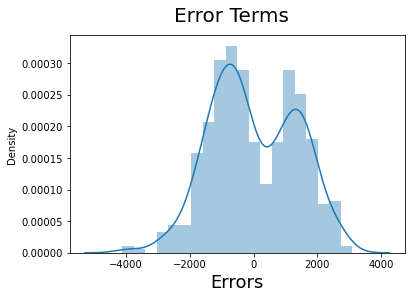

In [374]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [375]:
X_train_sm

,const,atemp,windspeed,summer,winter,Sept,Light
728,1.0,0.200348,0.663106,0,0,0,0
581,1.0,0.855850,0.533402,0,0,0,0
111,1.0,0.318819,0.380981,1,0,0,0
578,1.0,0.824359,0.187140,0,0,0,0
662,1.0,0.591497,0.176436,0,1,0,0
...,...,...,...,...,...,...,...
579,1.0,0.845071,0.372965,0,0,0,0
53,1.0,0.218747,0.111379,0,0,0,0
350,1.0,0.223544,0.431816,0,1,0,0
79,1.0,0.434043,0.529881,1,0,0,0


In [376]:
num_vars = ['temp','atemp','hum','windspeed']
#2. fit on data
#scaler.fit
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

<ipython-input-376-19168fe68372>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
C:\Users\jaypa\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,May,Jun,July,Aug,Sept,Oct,Nov,Dec,Cloudy,Light
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.707763,0.575561,0.540964,0.640864,0.314424,4572.260274,0.287671,0.246575,0.223744,...,0.077626,0.100457,0.095890,0.063927,0.091324,0.082192,0.068493,0.068493,0.324201,0.031963
std,0.188034,0.455833,0.228398,0.208895,0.148875,0.160212,1823.463903,0.453714,0.432005,0.417707,...,0.268194,0.301297,0.295115,0.245183,0.288730,0.275286,0.253169,0.253169,0.469148,0.176306
min,0.000000,0.000000,0.047379,0.025950,0.283633,-0.042808,506.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.381761,0.369380,0.526136,0.199175,3439.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.572353,0.553354,0.648671,0.298098,4586.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.768755,0.713315,0.742335,0.401064,5984.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.016896,0.980934,0.989717,0.807474,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [377]:
y_test = df_test.pop('cnt')
X_test = df_test

In [378]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()
X_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'Feb', 'Mar', 'April', 'May', 'Jun', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'Cloudy', 'Light'],
      dtype='object')

In [379]:
X_test_sm = X_test_sm.drop(['workingday','temp','fall','Feb', 'Mar', 'April', 'May', 'Jun','Aug','Oct', 'Nov', 'Dec', 'Cloudy'],axis=1)

In [380]:
X_test_sm = X_test_sm.drop(['holiday'],axis=1)

In [381]:
X_test_sm = X_test_sm.drop(['hum'],axis=1)

In [382]:
X_test_sm = X_test_sm.drop(['July'],axis=1)

In [383]:
X_test_sm

,const,atemp,windspeed,summer,winter,Sept,Light
239,1.0,0.746744,0.564011,0,0,0,0
493,1.0,0.622130,0.374298,1,0,0,0
446,1.0,0.644500,0.159076,1,0,0,0
482,1.0,0.391735,0.188475,1,0,0,0
149,1.0,0.777109,0.191162,1,0,0,0
...,...,...,...,...,...,...,...
613,1.0,0.756418,0.215231,0,0,1,0
72,1.0,0.332005,0.203418,0,0,0,0
676,1.0,0.344989,0.656831,0,1,0,0
462,1.0,0.542585,0.409090,1,0,0,0


In [384]:
X_train_sm

,const,atemp,windspeed,summer,winter,Sept,Light
728,1.0,0.200348,0.663106,0,0,0,0
581,1.0,0.855850,0.533402,0,0,0,0
111,1.0,0.318819,0.380981,1,0,0,0
578,1.0,0.824359,0.187140,0,0,0,0
662,1.0,0.591497,0.176436,0,1,0,0
...,...,...,...,...,...,...,...
579,1.0,0.845071,0.372965,0,0,0,0
53,1.0,0.218747,0.111379,0,0,0,0
350,1.0,0.223544,0.431816,0,1,0,0
79,1.0,0.434043,0.529881,1,0,0,0


In [385]:
y_test_pred = lr_model.predict(X_test_sm)

In [386]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.47101545173150383